<a href="https://colab.research.google.com/github/JENNAIM/example/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv "

df=pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
(df.isnull().sum()/len(df)*100).sort_values(ascending= False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


I'll drop the Cabin column due to excessive missing values, and also remove the Passenger ID and Name columns as they won't aid in predicting survival


In [44]:
df.drop(columns=['PassengerId','Cabin','Name','Ticket'],axis=1, inplace= True)

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
#Replacing the numerical missing values with the mean and the categorical values with the mode
numerical_col= df.select_dtypes(include=[float,int]).columns
df[numerical_col]= df[numerical_col].replace(np.nan,df[numerical_col].mean())

In [47]:
df['Embarked']=df['Embarked'].replace(np.nan,df['Embarked'].mode()[0])

In [48]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [49]:
def categorical_plot(x):
    # Create countplot with hue for survival status
    ax = sns.countplot(x=x, data=df, palette=['pink', 'green'], hue='Survived',hue_order=[0, 1])

    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    ax.legend(title='Survival Status', labels=['Did not survive (0)', 'Survived (1)'])

    # Dynamic labels and title based on column name
    plt.xlabel(x)
    plt.ylabel('Number of Passengers')
    plt.title(f'Count of Passengers by {x} and Survival Status')


    plt.show()




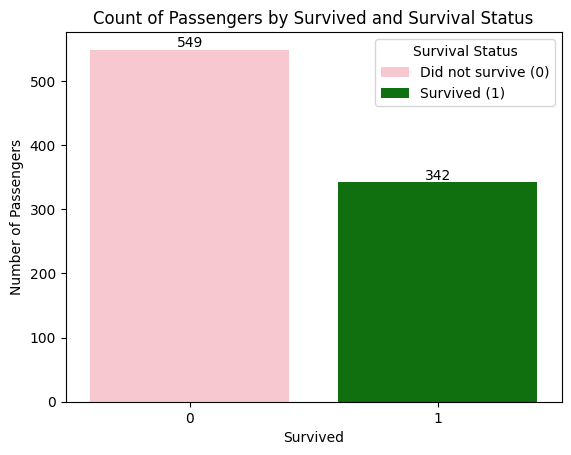

In [50]:
categorical_plot("Survived")

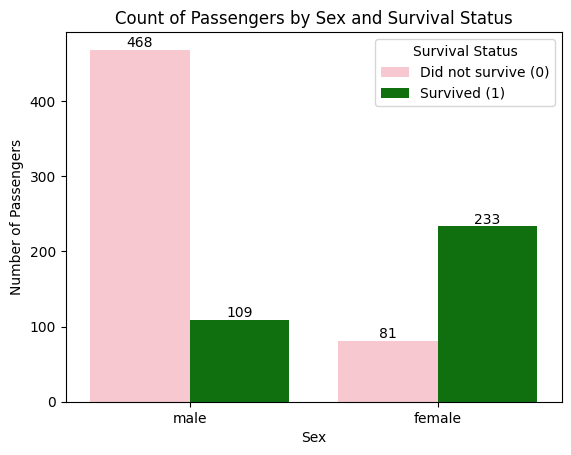

In [51]:
categorical_plot("Sex")


The survival rate for males was relatively low, with only 109 out of 577 males surviving. In contrast, females had a significantly higher survival rate. This disparity can be attributed to the prioritization of women and children for lifeboat access during the Titanic disaster.


In [52]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


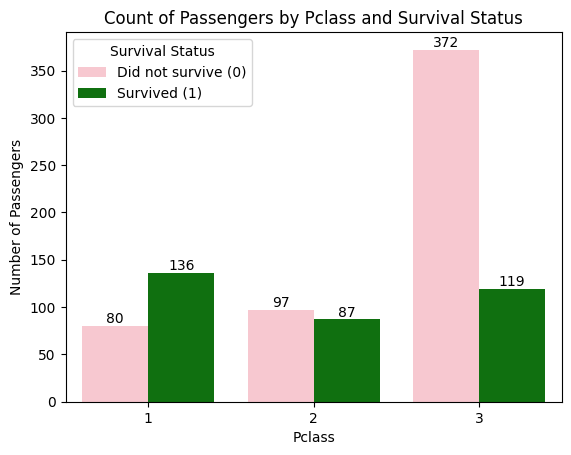

In [53]:
categorical_plot("Pclass")

Passengers in Class 3 had the highest number of fatalities, with 372 deaths. This is likely due to limited access to lifeboats and lower priority for evacuation compared to higher-class passengers

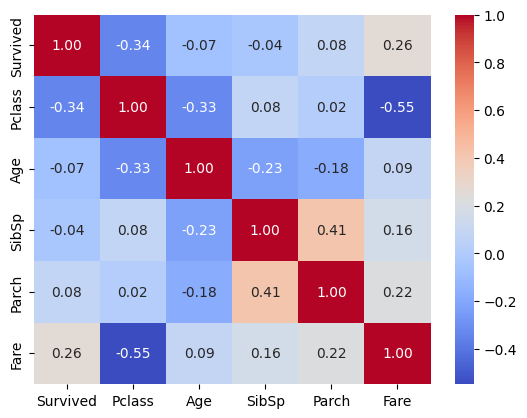

In [54]:
sns.heatmap(df[numerical_col].corr(),annot= True,fmt='.2f',cmap='coolwarm')
plt.show()

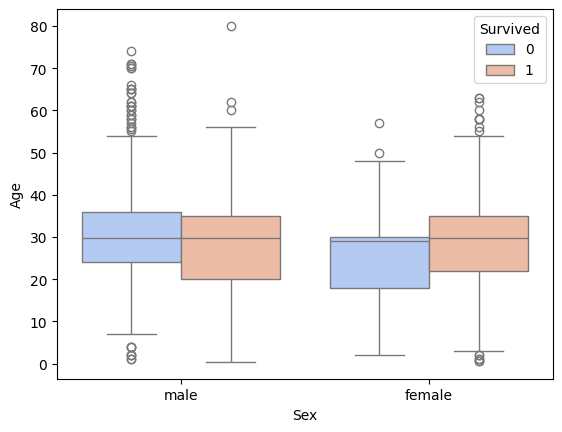

In [55]:
sns.boxplot(x="Sex",y='Age',data=df,palette="coolwarm",hue="Survived")
plt.show()

In [56]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split




# Split data
x = df.drop(columns=['Survived'])
y = df['Survived']
# Define feature columns automatically
numerical_cols = x.select_dtypes(include=[int,float]).columns.tolist()
categorical_cols = x.select_dtypes(include=[object]).columns.tolist()


# Check the column names
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer with automatically selected columns
preprocessor = ColumnTransformer(
    transformers=[ ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols),   # Scaling numerical columns
          # Encoding categorical columns
    ]
)

# Fit and transform x_train
x_train_processed = preprocessor.fit_transform(x_train)


Numerical columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: ['Sex', 'Embarked']


In [57]:
x_train_processed

array([[ 0.        ,  1.        ,  0.        , ..., -0.47072241,
        -0.47934164, -0.07868358],
       [ 0.        ,  1.        ,  0.        , ..., -0.47072241,
        -0.47934164, -0.37714494],
       [ 0.        ,  1.        ,  0.        , ..., -0.47072241,
        -0.47934164, -0.47486697],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.23056874,
        -0.47934164, -0.35580399],
       [ 1.        ,  0.        ,  0.        , ...,  0.37992316,
         2.04874166,  1.68320121],
       [ 0.        ,  1.        ,  0.        , ..., -0.47072241,
         0.78470001,  0.86074761]])

In [58]:
x_test_processed= preprocessor.transform(x_test)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=4)
rf_classifier.fit(x_train_processed,y_train)
y_pred = rf_classifier.predict(x_test_processed)


In [60]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [61]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)

In [62]:
accuracy

0.8044692737430168

About 74.3% of the predictions made by the model are correct.



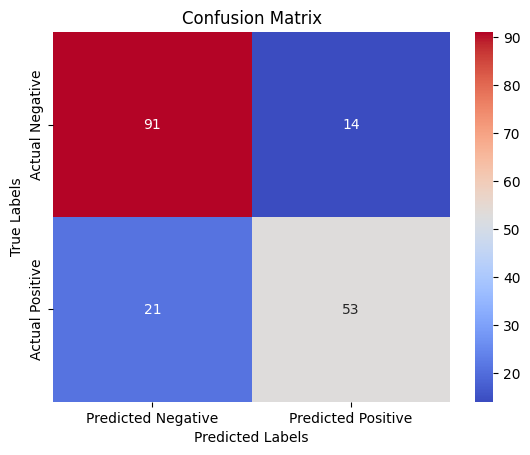

In [63]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="coolwarm",xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


 ROC AUC Score :0.7914414414414415


0.7914414414414415

In [77]:
from sklearn.metrics import classification_report
report= classification_report(y_test,y_pred)
print(f'The classification report \n{report}' )


The classification report 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-64-82eddc4252ed>, line 1)